In [90]:
# Import necessary libraries
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [92]:
# Load the dataset
diabetes_data = load_diabetes()
diabetes_data

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [94]:
# Create a DataFrame
df = pd.DataFrame(data=diabetes_data.data, columns=diabetes_data.feature_names)
df['target'] = diabetes_data.target
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [96]:
# Check for missing values
print(df.isnull().sum())

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64


In [98]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,442.0,-2.511817e-19,0.047619,-0.107226,-0.037299,0.005383,0.038076,0.110727
sex,442.0,1.230790e-17,0.047619,-0.044642,-0.044642,-0.044642,0.050680,0.050680
bmi,442.0,-2.245564e-16,0.047619,-0.090275,-0.034229,-0.007284,0.031248,0.170555
bp,442.0,-4.797570e-17,0.047619,-0.112399,-0.036656,-0.005670,0.035644,0.132044
s1,442.0,-1.381499e-17,0.047619,-0.126781,-0.034248,-0.004321,0.028358,0.153914
s2,442.0,3.918434e-17,0.047619,-0.115613,-0.030358,-0.003819,0.029844,0.198788
s3,442.0,-5.777179e-18,0.047619,-0.102307,-0.035117,-0.006584,0.029312,0.181179
s4,442.0,-9.042540e-18,0.047619,-0.076395,-0.039493,-0.002592,0.034309,0.185234
s5,442.0,9.293722e-17,0.047619,-0.126097,-0.033246,-0.001947,0.032432,0.133597
s6,442.0,1.130318e-17,0.047619,-0.137767,-0.033179,-0.001078,0.027917,0.135612


In [100]:
# Normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(df.drop('target', axis=1))  # Independent variables
y = df['target']  # Dependent variable (target)

In [102]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Exploratory Data Analysis-Understand the distribution of features and the target variable
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of the target variable
plt.figure(figsize=(8, 6))
sns.histplot(df['target'], bins=30, kde=True)
plt.title("Distribution of Diabetes Progression (Target Variable)")
plt.show()


In [ ]:
sns.boxplot(df['target'])

In [ ]:
# Visualize the relationship between features and target
plt.figure(figsize=(15, 10))
sns.pairplot(df, y_vars=['target'], x_vars=diabetes_data.feature_names,height=2)
plt.show()


In [ ]:
sns.scatterplot(data=df,x='age',y='target')
plt.title("Age vs diabetic progression")
plt.xticks(np.arange(0,1,1))
plt.show()

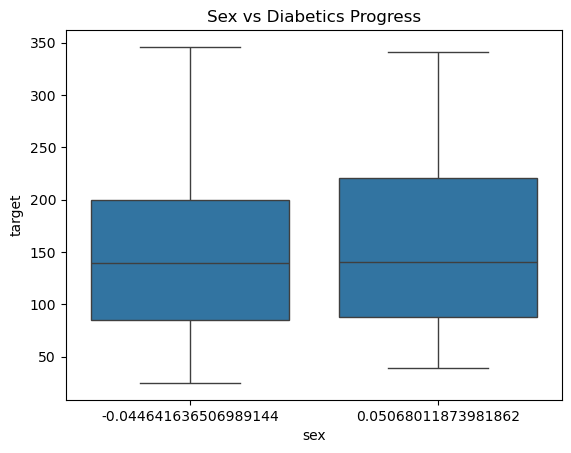

In [112]:
sns.boxplot(data=df,x='sex',y='target')
plt.title("Sex vs Diabetics Progress")
plt.show()

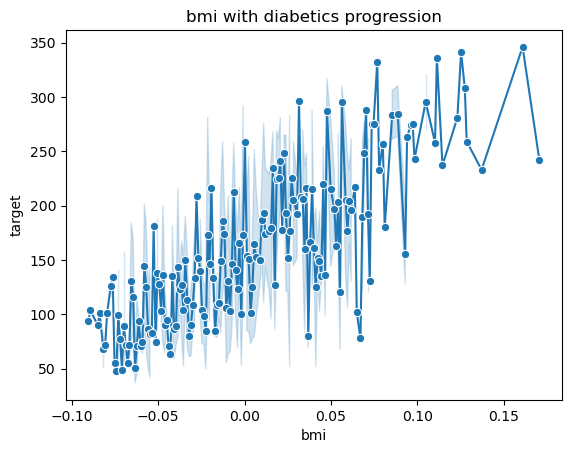

In [114]:
sns.lineplot(data=df,x=df['bmi'],y=df['target'],marker='o')
plt.title("bmi with diabetics progression")
plt.xlabel('bmi')
plt.ylabel('target')
plt.show()

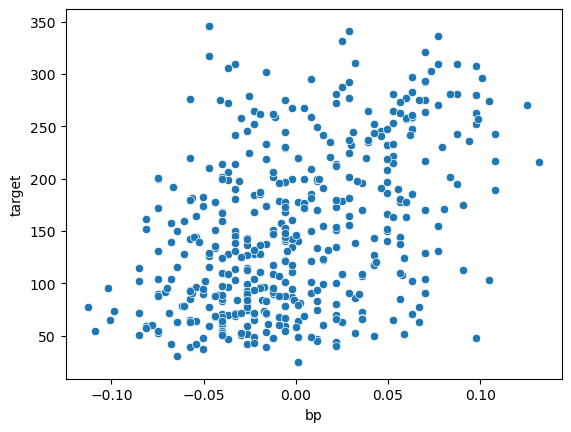

In [116]:
sns.scatterplot(data=df,x='bp',y='target')
plt.show()

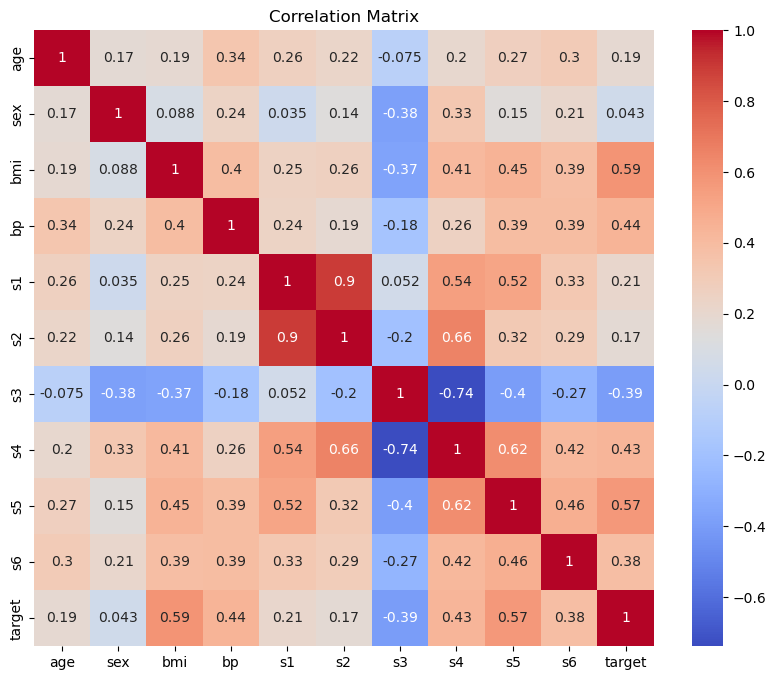

In [118]:
# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [120]:
!pip install tensorflow

In [124]:

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

# Initialize the Sequential model
model = Sequential()

# Input Layer: Explicitly use the Input layer to define the input shape
model.add(Input(shape=(X_train.shape[1],)))  # Define the input shape (number of features)

# Hidden Layer
model.add(Dense(64, activation='relu'))  # 64 neurons, ReLU activation

# Another Hidden Layer
model.add(Dense(32, activation='relu'))  # 32 neurons, ReLU activation

# Output Layer (since it's regression, no activation function)
model.add(Dense(1))  # 1 output neuron for regression task


In [126]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Display the model's architecture
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 64)                  │             704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,817 (11.00 KB)

 Trainable params: 2,817 (11.00 KB)

 Non-trainable params: 0 (0.00 B)

In [128]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [130]:
# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32, verbose=1)


Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 11s 65ms/step - loss: 29446.0859 - mae: 152.4790 - val_loss: 26086.8535 - val_mae: 144.1687
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 29063.8672 - mae: 151.8397 - val_loss: 25761.1914 - val_mae: 143.0199
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 27485.7461 - mae: 145.8880 - val_loss: 25333.4551 - val_mae: 141.5235
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 26810.0859 - mae: 144.4990 - val_loss: 24767.9688 - val_mae: 139.5460
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 29178.7266 - mae: 152.5210 - val_loss: 24032.4863 - val_mae: 136.9614
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 25910.5371 - mae: 140.4140 - val_loss: 23140.6133 - val_mae: 133.7320
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 24677.5098 - mae: 137.9482 - val_loss: 21984.5176 - val_mae: 129.5697
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 23835.0508 - mae: 134.6816 - val

In [132]:
# Evaluate the model on test data
test_loss, test_mae = model.evaluate(X_test, y_test)

# Print evaluation metrics
print(f"Test Loss (MSE): {test_loss}")
print(f"Test Mean Absolute Error: {test_mae}")


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 3043.6860 - mae: 44.6380
Test Loss (MSE): 2861.286376953125
Test Mean Absolute Error: 43.045284271240234


In [134]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict on test data
y_pred = model.predict(X_test)

# Calculate MSE and R² score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Mean Squared Error: 2861.286282695722
R² Score: 0.4599463325117411


In [138]:
# Improved ANN model with more layers and neurons
model_improved = Sequential()

# Input layer (using Input object to avoid the warning)
model_improved.add(Input(shape=(X_train.shape[1],)))  # Explicitly define input shape

# Hidden layers
model_improved.add(Dense(128, activation='relu'))  # First hidden layer
model_improved.add(Dense(64, activation='relu'))   # Second hidden layer
model_improved.add(Dense(32, activation='relu'))   # Third hidden layer

# Output layer (no activation for regression)
model_improved.add(Dense(1))

# Compile the improved model
model_improved.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the improved model
history_improved = model_improved.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=150, batch_size=16, verbose=1)

# Evaluate the improved model on the test set
test_loss_improved, test_mae_improved = model_improved.evaluate(X_test, y_test)

# Predict and calculate performance metrics
y_pred_improved = model_improved.predict(X_test)
mse_improved = mean_squared_error(y_test, y_pred_improved)
r2_improved = r2_score(y_test, y_pred_improved)

# Print performance metrics
print(f"Improved MSE: {mse_improved}")
print(f"Improved R² Score: {r2_improved}")


Epoch 1/150
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 28234.9453 - mae: 149.1460 - val_loss: 25670.5371 - val_mae: 142.6725
Epoch 2/150
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 29148.5957 - mae: 151.8650 - val_loss: 22694.7773 - val_mae: 131.9609
Epoch 3/150
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 25573.2051 - mae: 139.9081 - val_loss: 14618.9766 - val_mae: 99.9945
Epoch 4/150
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 13534.7363 - mae: 94.7060 - val_loss: 5033.2642 - val_mae: 54.6419
Epoch 5/150
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5165.2183 - mae: 56.8537 - val_loss: 4194.8042 - val_mae: 51.5046
Epoch 6/150
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4873.6030 - mae: 55.5371 - val_loss: 3870.4790 - val_mae: 49.1974
Epoch 7/150
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4025.7869 - mae: 50.4199 - val_loss: 3685.3984 - val_mae: 48.8092
Epoch 8/150
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3341.2949 - mae: 46.5143 - val_loss: 3509.0945 - val_

Increased Complexity:

Original Model: Used 1 hidden layer with 64 neurons.
Improved Model: Increased to 3 hidden layers with 128, 64, and 32 neurons, respectively.

More Epochs:

Original Model: Trained for 100 epochs.
Improved Model: Trained for 150 epochs to allow more time for learning.

Batch Size:

Original Model: Used a batch size of 32.
Improved Model: Reduced batch size to 16 for more frequent updates to the weights during training.
Optimization:

Both models used the Adam optimizer and Mean Squared Error (MSE) as the loss function.
Increasing the model complexity (more layers and neurons) and training for more epochs improved the model's ability to capture patterns in the data. Reducing the batch size also allowed for more frequent weight updates, improving convergence.